## The Secretary Problem

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
N = 1000
Candidatos =np.arange(N)+1

### Algoritmo Óptimo

In [87]:
def optimo(lista_candidatos):
    N = lista_candidatos.size
    elMejor = N+1
    contratado = lista_candidatos[-1]
    tau = N/np.e
    for indx,i in enumerate(lista_candidatos):
        if indx<tau:
            if elMejor>i:
                elMejor=i
            else:
                continue
        if indx>=tau:
            if elMejor>i:
                contratado = i
                break
            else:
                continue
    return contratado

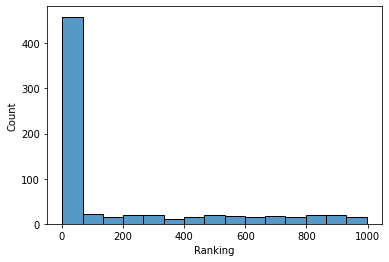

In [88]:
candidatosOptimos = []
for i in range(700):
    np.random.shuffle(Candidatos)
    candidatosOptimos.append(optimo(Candidatos))
candidatosOptimos = np.array(candidatosOptimos)
plt.clf()
ax = sns.histplot(candidatosOptimos)
ax.set(xlabel='Ranking')
plt.show()

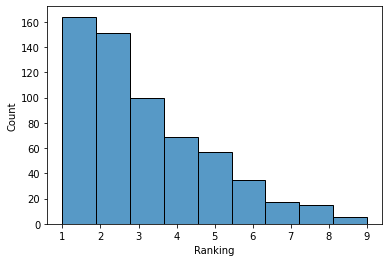

In [123]:
primeros = candidatosOptimos[np.where(candidatosOptimos<10)]
plt.clf()
ax = sns.histplot(primeros, bins=9)
ax.set(xlabel='Ranking')
plt.show()

In [124]:
losPrimeros = candidatosOptimos[np.where(candidatosOptimos<50)]
losPrimeros.size/700

0.9014285714285715

### Relación entre $\tau$ y N

In [91]:
def fun1(t,n):
    ans = 0
    for i in range(t,n):
        ans += (1/i)
    return ans

def tau(n):
    return max([t for t in range(1,n) if (fun1(t,n)>1)], default=1)

In [92]:
tauList = []
uOptis = []
for i in range(1,50):
    tauList.append(tau(i))
    uOptis.append(max(tau(i)/i, (tau(i)/i)*fun1(tau(i),i)))

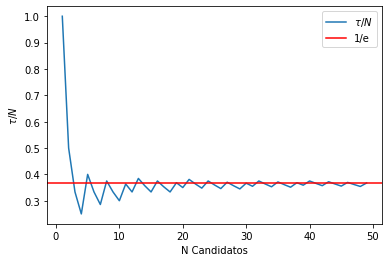

In [93]:
plt.plot(range(1,50),np.divide(tauList,range(1,50)), label=r'$\tau/N$')
plt.xlabel("N Candidatos")
plt.ylabel(r'$\tau / N$')
plt.axhline(y=1/np.e, c='r', label='1/e')
plt.legend()
plt.show()

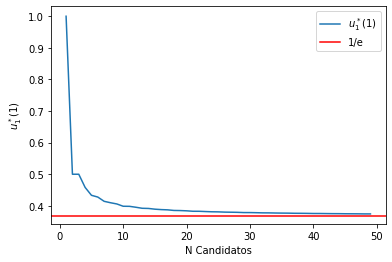

In [94]:
plt.plot(range(1,50),uOptis, label=r'$u^*_1 (1)$')
plt.xlabel("N Candidatos")
plt.ylabel(r'$u^*_1 (1)$')
plt.axhline(y=1/np.e, c='r', label='1/e')
plt.legend()
plt.show()

# Los dos mejores

In [75]:
import sys
sys.setrecursionlimit(1500)

In [79]:
def uOpti(t,s,N, list):
    if t==N:
        if s==1:
            list = np.insert(list,0, 1, axis=0)
        elif s==0:
            list = np.insert(list,0, 0, axis=0)
    else:
        return (2/(t+1))*(uOpti(t+1,1,N)) + ((t-1)/(t+1))*(uOpti(t+1,0,N))

In [5]:
def u0t(t,N, u0tt, u1tt):
    #dados u1 en t+1 y u0 en t+1 calcula u0 en t
    return (2/(t+1))*(u1tt) + ((t-1)/(t+1))*(u0tt)

def u1t(t, N, u0t):
    #dados calcula u1 en t
    return max(u0t, (t/N)*(2-(t-1)/(N-1)))

In [6]:
def optimo2(lista_candidatos):
    N = lista_candidatos.size
    elMejor = N+1
    elSegundoMejor = N+1
    contratado = lista_candidatos[-1]
    u0s= np.array([])
    for t in range(N, 0, -1):
        if t==N:
            u1tt=1
            u0tt=0
        else:
            u0tt= u0t(t,N,u0tt, u1tt)
            u1tt= u1t(t,N,u0tt)
        u0s = np.insert(u0s,0, u0t(t,N, u0tt,u1tt))

    for indx,i in enumerate(lista_candidatos):
        probContratar = (indx/N)*(2-(indx-1)/(N-1))
        probSeguir    = u0s[indx]
        if probContratar<probSeguir:
            if elMejor>i:
                elMejor=i
            elif elSegundoMejor>i:
                elSegundoMejor=i
            else:
                continue
        if probContratar>=probSeguir:
            if (elMejor>=i or elSegundoMejor>=i):
                contratado = i
                break
            else:
                continue
    return contratado

In [5]:
candidatosOptimos = []
for i in range(700):
    np.random.shuffle(Candidatos)
    candidatosOptimos.append(optimo2(Candidatos))
candidatosOptimos = np.array(candidatosOptimos)

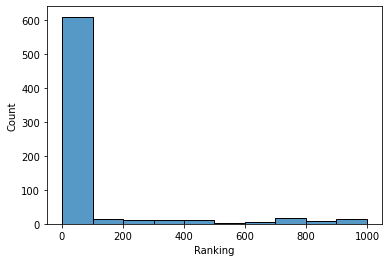

In [6]:
plt.clf()
ax = sns.histplot(candidatosOptimos, bins=10)
ax.set(xlabel='Ranking')
plt.show()

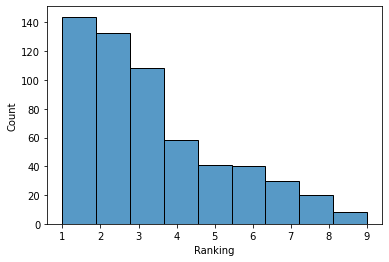

In [7]:
primeros = candidatosOptimos[np.where(candidatosOptimos<10)]
plt.clf()
ax = sns.histplot(primeros, bins=9)
ax.set(xlabel='Ranking')
plt.show()

In [8]:
losPrimeros = candidatosOptimos[np.where(candidatosOptimos<50)]
losPrimeros.size/700

0.8657142857142858

In [119]:
losPrimeros = candidatosOptimos[np.where(candidatosOptimos>=50)]
losPrimeros.size/700

0.09857142857142857

In [120]:
losPrimeros.size

69

In [121]:
losPrimeros.size

69

In [13]:
N=100000
u0s= np.array([])
for t in range(N, 0, -1):
    if t==N:
       u1tt=1
       u0tt=0
    else:
        u0tt= u0t(t,N,u0tt, u1tt)
        u1tt= u1t(t,N,u0tt)
    u0s = np.insert(u0s,0, u0t(t,N, u0tt,u1tt))


In [18]:
k = 200
tauN = np.zeros(k)
for i in range(1,k):
    N = i
    u0s= np.array([])
    for t in range(N, 0, -1):
        if t==N:
            u1tt=1
            u0tt=0
        else:
            u0tt= u0t(t,N,u0tt, u1tt)
            u1tt= u1t(t,N,u0tt)
        u0s = np.insert(u0s,0, u0t(t,N, u0tt,u1tt))
    
    jold = u0s[0]
    for indx,j in enumerate(u0s):
        jnew=j
        if abs(jold-jnew)<0.0000001:
            jold = jnew
            continue
        else:
            tauN[i] = indx/N
            break


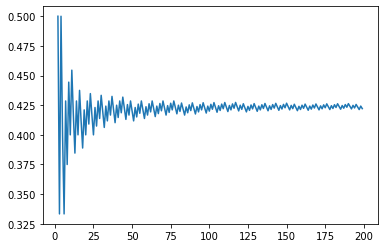

In [19]:
plt.plot(np.arange(2,k),tauN[2:])

# Punto STONKS

In [33]:
x=np.arange(0,30)+1
y = np.maximum(100*(29-x)-50, 2851-100*x )

In [312]:
probMove = [0.4, 0.1, 0.5]
def utx(stonk, utxMas, utx0, utxMenos):
    # accion 0 : comprar
    # accion 1 : continuar para comprar
    # accion 2 : continuar para no comprar
    recomps = np.array([100*(29-stonk)-50, probMove[0]*utxMas+probMove[1]*utx0+probMove[2]*utxMenos,0])
    accion = np.argmax(recomps)
    return recomps[accion], accion

def arboltt(t, step =0.1):
    dt = step*t
    return np.linspace(30-dt, 30+dt, int((2*dt)/step)+1)

In [313]:
N = 30
u0s = []
acciones = []
for t in range(N, -1, -1):
    arbol = arboltt(t)
    if t==N:
        u0 = np.maximum(100*(29-arbol)-50, np.zeros_like(arbol))
        accion = 2*(u0==0)
    else:
        u0new = np.zeros_like(arbol)
        accionNew = np.zeros_like(arbol)  
        for indx, stonk in enumerate(arbol):
            recomp, acciony = utx(stonk, u0[indx+2], u0[indx+1], u0[indx]) 
            u0new[indx] = recomp
            accionNew[indx] = acciony
        u0 = u0new
        accion = accionNew
    u0s.append(u0)
    acciones.append(accion)
u0s = u0s[::-1]
acciones = acciones[::-1]

In [314]:
def simul():
    stonks = 30
    global precio
    precio = np.array(stonks)
    for t in range(0,N+1):
        ubic = int(np.argwhere(abs(arboltt(t)-stonks)<0.001))
        if acciones[t][ubic]==0:
            return u0s[t][ubic]
            break
        stonks += np.random.choice([0.1, 0, -0.1], p=[0.4, 0.1, 0.5])
        precio = np.append(precio, stonks)
    return 0

In [270]:
numveces = 10000
ganancias = 0
for i in range(numveces):
    ganancias += (simul()!=0)
ganancias

63

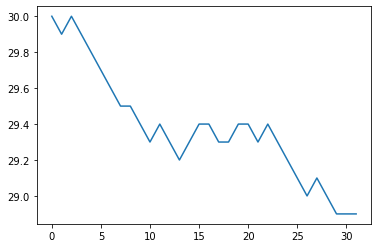

In [90]:
N = 30
stonks = 30
precio = np.array(stonks)
stonk = np.linspace(27,33, int((33-27)/0.1)+1)

for t in range(1,N):
    
    if i<dias:
        recomps = [100*(29-stonks)-50, 2851-100*stonks, 0]
        accion = np.argmax(recomps)
        if accion==0:
            print(i)
            a,b = recomps[accion], i
            break
             

    elif i==dias:
        recomps = [100*(29-stonks)-50,0]
        accion = np.argmax(recomps)
        if accion==0:
            a,b= recomps[accion], i
            break
    else:
        a,b = None, 0
    l = np.random.choice([0.1, 0, -0.1], p=[0.4, 0.1, 0.5])
    stonks += l
    precio = np.append(precio, stonks)

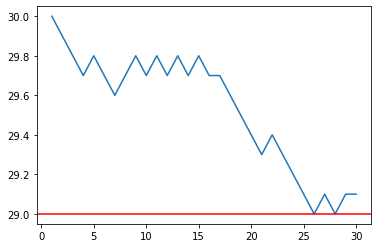

In [93]:
plt.plot(x[:precio.size] ,precio)
plt.axhline(y=29, c='r')

In [72]:
 np.random.choice([0.1, 0, -0.1], p=[0.4, 0.1, 0.5])

-0.1

In [ ]:
    u0s= np.array([])
    for t in range(N, 0, -1):
        if t==N:
            u1tt=1
            u0tt=0
        else:
            u0tt= u0t(t,N,u0tt, u1tt)
            u1tt= u1t(t,N,u0tt)
        u0s = np.insert(u0s,0, u0t(t,N, u0tt,u1tt))

In [104]:
stonk = np.linspace(27,33, int((33-27)/0.1)+1)

stonk[1:-1]

array([27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28. , 28.1,
       28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29. , 29.1, 29.2,
       29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2, 30.3,
       30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. , 31.1, 31.2, 31.3, 31.4,
       31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2, 32.3, 32.4, 32.5,
       32.6, 32.7, 32.8, 32.9])

2
3
4
